In [42]:
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import pyshtools as pysh
from sklearn.decomposition import PCA
from matplotlib.lines import Line2D

In [2]:
import utils 
import spharm

In [50]:
mesh_dict = {
    'spherical': [5, 40],
    'elongated': [27, 33, 42],
    'two_crypts': [20, 32],
    'mickey_mouse': [23, 35],
    'three_crypts': [29],
    'blobby': [28, 38],
}

lookup_dict = {}
for category, values in mesh_dict.items():
    for value in values:
        lookup_dict[value] = category

print(lookup_dict)

colors_dict = {
    'spherical': '#1f77b4',    # Steel blue
    'elongated': '#ff7f0e',    # Bright orange
    'two_crypts': '#2ca02c',   # Forest green
    'mickey_mouse': '#d62728', # Brick red
    'three_crypts': '#9467bd', # Medium purple
    'blobby': '#8c564b'        # Brown
}

{5: 'spherical', 40: 'spherical', 27: 'elongated', 33: 'elongated', 42: 'elongated', 20: 'two_crypts', 32: 'two_crypts', 23: 'mickey_mouse', 35: 'mickey_mouse', 29: 'three_crypts', 28: 'blobby', 38: 'blobby'}


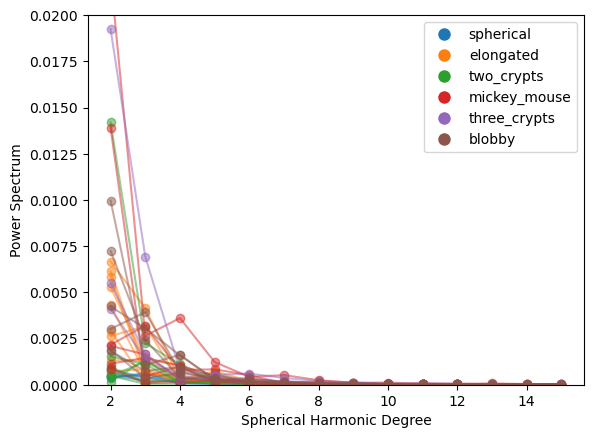

In [55]:
spectrums = [] 
ls = np.arange(2, 16)
for n in lookup_dict.keys(): 
    m = spharm.SpHarm()
    m.load_results(f'sim/{n}')
    for i in range(3): 
        # print(m.clms[i].shape)
        sh = pysh.SHCoeffs.from_array(m.clms[i])
        spectrum = sh.spectrum() 
        spectrums.append(spectrum[2:])
        plt.plot(ls, spectrum[2:], 'o-', color=colors_dict[lookup_dict[n]], alpha=0.5)

legend_elements = [Line2D([0], [0], marker='o', color='w', 
                   markerfacecolor=color, markersize=10, label=category)
                   for category, color in colors_dict.items()]

# Add the legend with all categories
plt.legend(handles=legend_elements, loc='best', frameon=True)

plt.ylim([0, 0.02])
plt.xlabel('Spherical Harmonic Degree')
plt.ylabel('Power Spectrum')
plt.show() 

spectrums = np.array(spectrums).reshape(len(lookup_dict.keys()), -1)

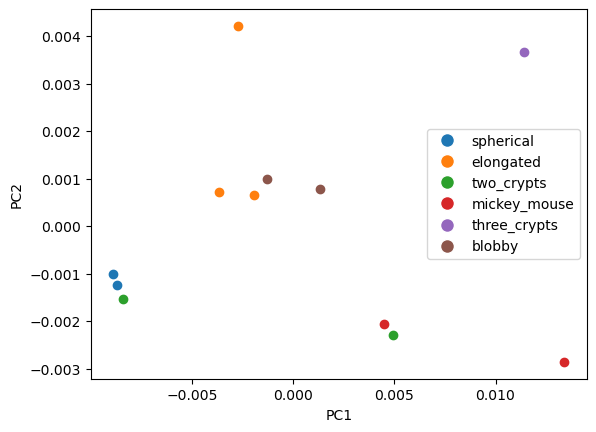

In [56]:
pca = PCA(n_components=2)
res = pca.fit(spectrums) 

spectrum_pcs = pca.transform(spectrums)

colors_dict = {
    'spherical': '#1f77b4',    # Steel blue
    'elongated': '#ff7f0e',    # Bright orange
    'two_crypts': '#2ca02c',   # Forest green
    'mickey_mouse': '#d62728', # Brick red
    'three_crypts': '#9467bd', # Medium purple
    'blobby': '#8c564b'        # Brown
}

for (i, n) in enumerate(lookup_dict.keys()):
    plt.plot(spectrum_pcs[i, 0], spectrum_pcs[i, 1], 'o', color=colors_dict[lookup_dict[n]]) 

from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', 
                   markerfacecolor=color, markersize=10, label=category)
                   for category, color in colors_dict.items()]

# Add the legend with all categories
plt.legend(handles=legend_elements, loc='best', frameon=True)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show() 

